# Analysis

### Data Analysis / Distribution
We would like to visualise whether some labels co-occur more often with others. Therefore, we will have a look at pair-wise co-occurrences of labels in the dataset and show them as a 7x7-Matrix:

In [1]:
from dontpatronizeme.ext_dont_patronize_me import DontPatronizeMe

dpm = DontPatronizeMe('data/dontpatronizeme_v1.4/dontpatronizeme_categories.tsv', '')
dpm.load_task2()
dpm.train_task2_df

Map of label to numerical label:
{'Unbalanced_power_relations': 0, 'Shallow_solution': 1, 'Presupposition': 2, 'Authority_voice': 3, 'Metaphors': 4, 'Compassion': 5, 'The_poorer_the_merrier': 6}


,par_id,art_id,text,keyword,country,label
0,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,"[1, 0, 0, 1, 0, 0, 0]"
1,1279,@@7896098,Pope Francis washed and kissed the feet of Mus...,refugee,ng,"[0, 1, 0, 0, 0, 0, 0]"
2,8330,@@17252299,Many refugees do n't want to be resettled anyw...,refugee,ng,"[0, 0, 1, 0, 0, 0, 0]"
3,4063,@@3002894,"""Budding chefs , like """" Fred """" , """" Winston ...",in-need,ie,"[1, 0, 0, 1, 1, 1, 0]"
4,4089,@@25597822,"""In a 90-degree view of his constituency , one...",homeless,pk,"[1, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...
988,873,@@20374243,Citing the fact that these kids who died at Go...,poor-families,sg,"[1, 0, 0, 0, 1, 0, 0]"
989,10070,@@15573661,Fern ? ndez was a well-known philanthropist wh...,disabled,ng,"[1, 0, 0, 0, 0, 0, 0]"
990,6484,@@2559173,"Touched much by their plight , Commanding Offi...",homeless,lk,"[1, 0, 0, 0, 0, 1, 0]"
991,6249,@@1947926,She reiterated her ministry 's commitment to p...,women,gh,"[1, 0, 0, 0, 0, 0, 0]"


Let's first look at the co-occurrences of the 7 lower level labels:

In [2]:
ll_categories = ['Unbalanced_power_relations', 'Shallow_solution', 'Presupposition', 'Authority_voice', 'Metaphors', 'Compassion', 'The_poorer_the_merrier']
co_occurrences = [[0 for i in range(len(ll_categories))] for j in range(len(ll_categories))]

In [3]:
for label in dpm.train_task2_df.loc[:, 'label']:
    for i in range(len(label)):
        for j in range(i, len(label)):
            co_occurrences[i][j] += label[i] and label[j]

In [4]:
import pandas as pd
pd.DataFrame(co_occurrences, index = ll_categories, columns = ll_categories)

,Unbalanced_power_relations,Shallow_solution,Presupposition,Authority_voice,Metaphors,Compassion,The_poorer_the_merrier
Unbalanced_power_relations,716,180,110,155,108,259,22
Shallow_solution,0,196,13,22,23,53,2
Presupposition,0,0,224,80,61,145,13
Authority_voice,0,0,0,230,54,98,7
Metaphors,0,0,0,0,197,134,9
Compassion,0,0,0,0,0,469,16
The_poorer_the_merrier,0,0,0,0,0,0,40


We can see that of the 196 samples labelled with Shallow Solution, only 16 do not coincide with Unbalanced Power Relations. Also, all other categories share more than half of their paragraphs with Unbalanced Power Relations. This is probably due to the overrepresentation of this category in the dataset.

Now let us have a look at the higher level labels:

In [5]:
hl_categories = ['The saviour', 'The expert', 'The poet']
hl_co_occurrences = [[0 for i in range(len(hl_categories))] for j in range(len(hl_categories))]
for label in dpm.train_task2_df.loc[:, 'label']:
    # taken from Data Preprocessing
    # mapping indices 0, 1 -> 0; 2, 3 -> 1; 4, 5, 6 -> 2
    row_hl_labels = [0, 0, 0]
    if sum(label[0:2]) >= 1:
        row_hl_labels[0] = 1
    if sum(label[2:4]) >= 1:
        row_hl_labels[1] = 1
    if sum(label[4:]) >= 1:
        row_hl_labels[2] = 1
        
    for i in range(len(row_hl_labels)):
        for j in range(i, len(row_hl_labels)):
            hl_co_occurrences[i][j] += row_hl_labels[i] and row_hl_labels[j]

pd.DataFrame(hl_co_occurrences, index = hl_categories, columns = hl_categories)

,The saviour,The expert,The poet
The saviour,732,224,324
The expert,0,374,236
The poet,0,0,552


Here, we don't see very explicit trends, but that all three categories often occur together with the other two.

In [6]:
from collections import Counter
label_count = Counter([str(x) for x in dpm.train_task2_df.loc[:, 'label']])
label_count.most_common(5)

[('[1, 0, 0, 0, 0, 0, 0]', 189),
 ('[1, 1, 0, 0, 0, 0, 0]', 105),
 ('[1, 0, 0, 0, 0, 1, 0]', 95),
 ('[0, 0, 0, 0, 0, 1, 0]', 65),
 ('[1, 0, 0, 1, 0, 0, 0]', 56)]

In [7]:
import matplotlib.pyplot as plt

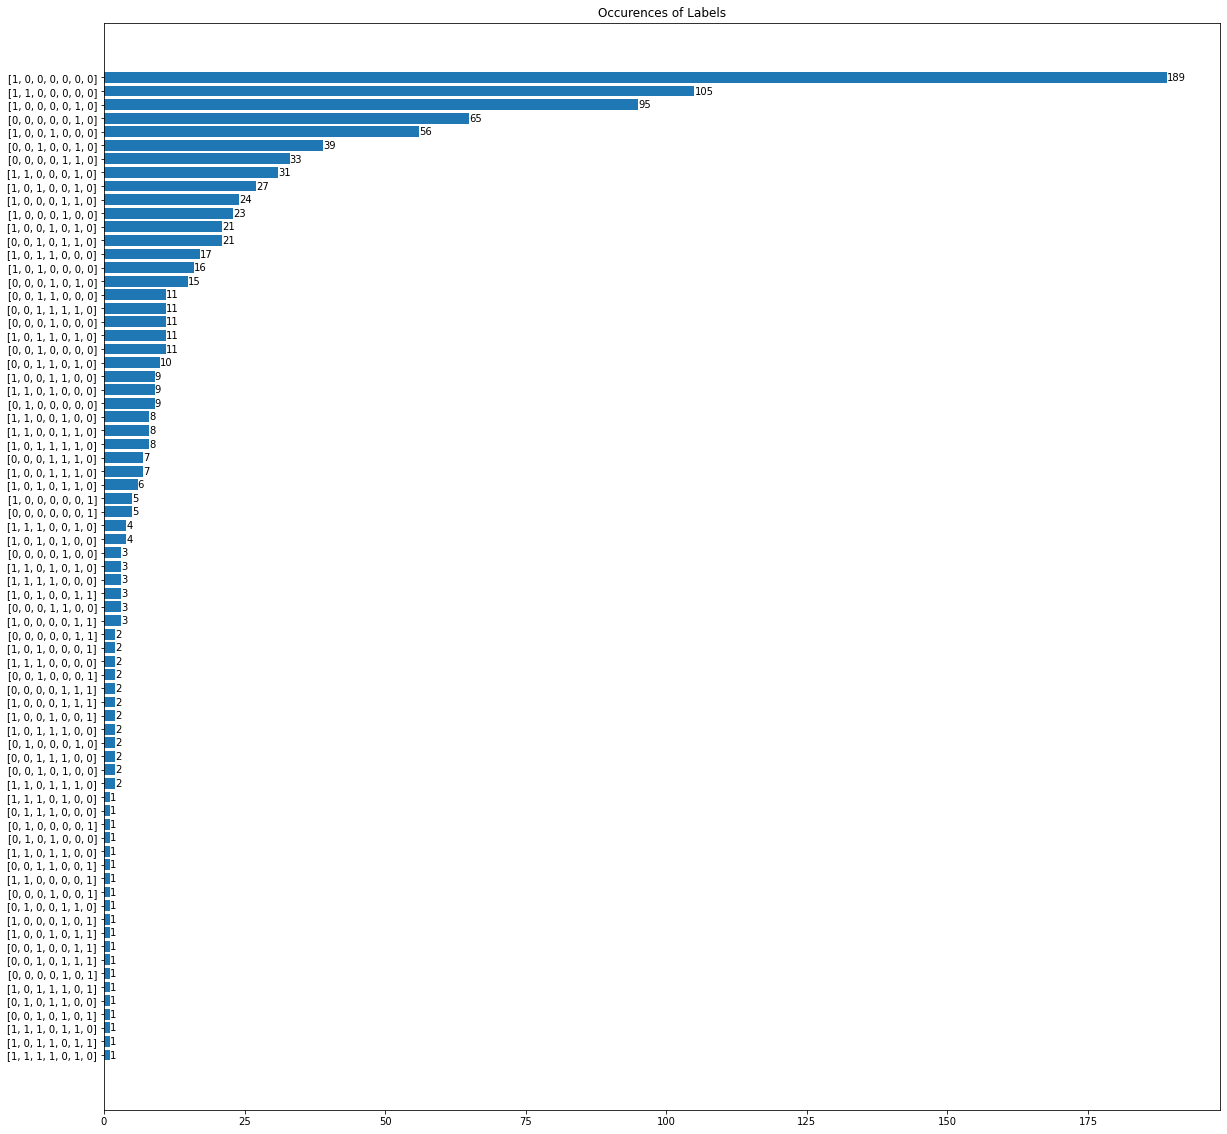

In [8]:
x = sorted(label_count, key=label_count.get)
y = sorted(label_count.values())
plt.rcParams["figure.figsize"] = (20,20)
barcontainer = plt.barh(x, y)
plt.bar_label(barcontainer,y, label_type='edge')
plt.title('Occurences of Labels')
plt.show()

We can see that the most occurring label is the one where only Unbalanced Power Relations could be found in the paragraph. Some of the top labels also contain this category, but interestingly, the 4th, 6th, and 7th place are taken by labels not containing this category. This suggests that Unbalanced Power Relations are not omnipresent and that there are other trends going on. E.g. the second to last category, Metaphor, also has 65 unique occurrences, without being coupled with any other category.

### Checking predictions on test data

We will now have a look at the distribution of labels in the test data vs. our Logistic Regression and k-Fold Bi-LSTM predictions.

In [9]:
# load train and test data by our own split
dpm_models = DontPatronizeMe('./data/dpm_train.csv', './data/dpm_test.csv')
dpm_models.load_test()

In [10]:
true_count = Counter(dpm_models.test_set_df.loc[:, 'label'])
true_count.most_common(5)

[('[1, 0, 0, 0, 0, 0, 0]', 24),
 ('[1, 0, 0, 0, 0, 1, 0]', 20),
 ('[1, 0, 0, 1, 0, 0, 0]', 12),
 ('[1, 0, 1, 0, 0, 1, 0]', 12),
 ('[1, 1, 0, 0, 0, 0, 0]', 12)]

In [11]:
# load predictions of best performing Logistic Regression
import pickle, numpy as np
pred_logreg = pickle.load(open('data/pred_logreg.obj', 'rb'))
pred_logreg_count = Counter([str(list(x)) for x in pred_logreg])
pred_logreg_count

Counter({'[1, 0, 0, 0, 0, 0, 0]': 115,
         '[1, 0, 0, 0, 0, 1, 0]': 60,
         '[1, 0, 0, 1, 0, 0, 0]': 1,
         '[0, 0, 0, 0, 0, 1, 0]': 1})

In [12]:
# load predictions of best performing k-Fold Cross Validation Bi-LSTM
pred_low_cv = pickle.load(open('data/pred_low_cv.obj','rb'))
pred_lstm_count = Counter([str(list(x)) for x in pred_low_cv[3]])
pred_lstm_count.most_common(5)

[('[1, 0, 0, 0, 0, 0, 0]', 54),
 ('[1, 1, 0, 0, 0, 0, 0]', 21),
 ('[1, 0, 0, 1, 0, 0, 0]', 18),
 ('[1, 0, 0, 0, 0, 1, 0]', 14),
 ('[1, 0, 1, 1, 0, 1, 0]', 8)]

In [13]:
# get combined labels by unioning all labels occurring in test set and predictions
x_elements = set(pred_lstm_count.keys()).union(set(true_count.keys())).union(set(pred_logreg_count))
len(x_elements), len(pred_lstm_count), len(true_count), len(pred_logreg_count)

(51, 31, 45, 4)

In [14]:
# pad non-existing labels in predictions and test labels with count of 0
for key in x_elements:
    if not key in pred_lstm_count:
        pred_lstm_count[key] = 0
for key in x_elements:
    if not key in true_count:
        true_count[key] = 0
for key in x_elements:
    if not key in pred_logreg_count:
        pred_logreg_count[key] = 0
x_elements = sorted(x_elements, key=true_count.get)

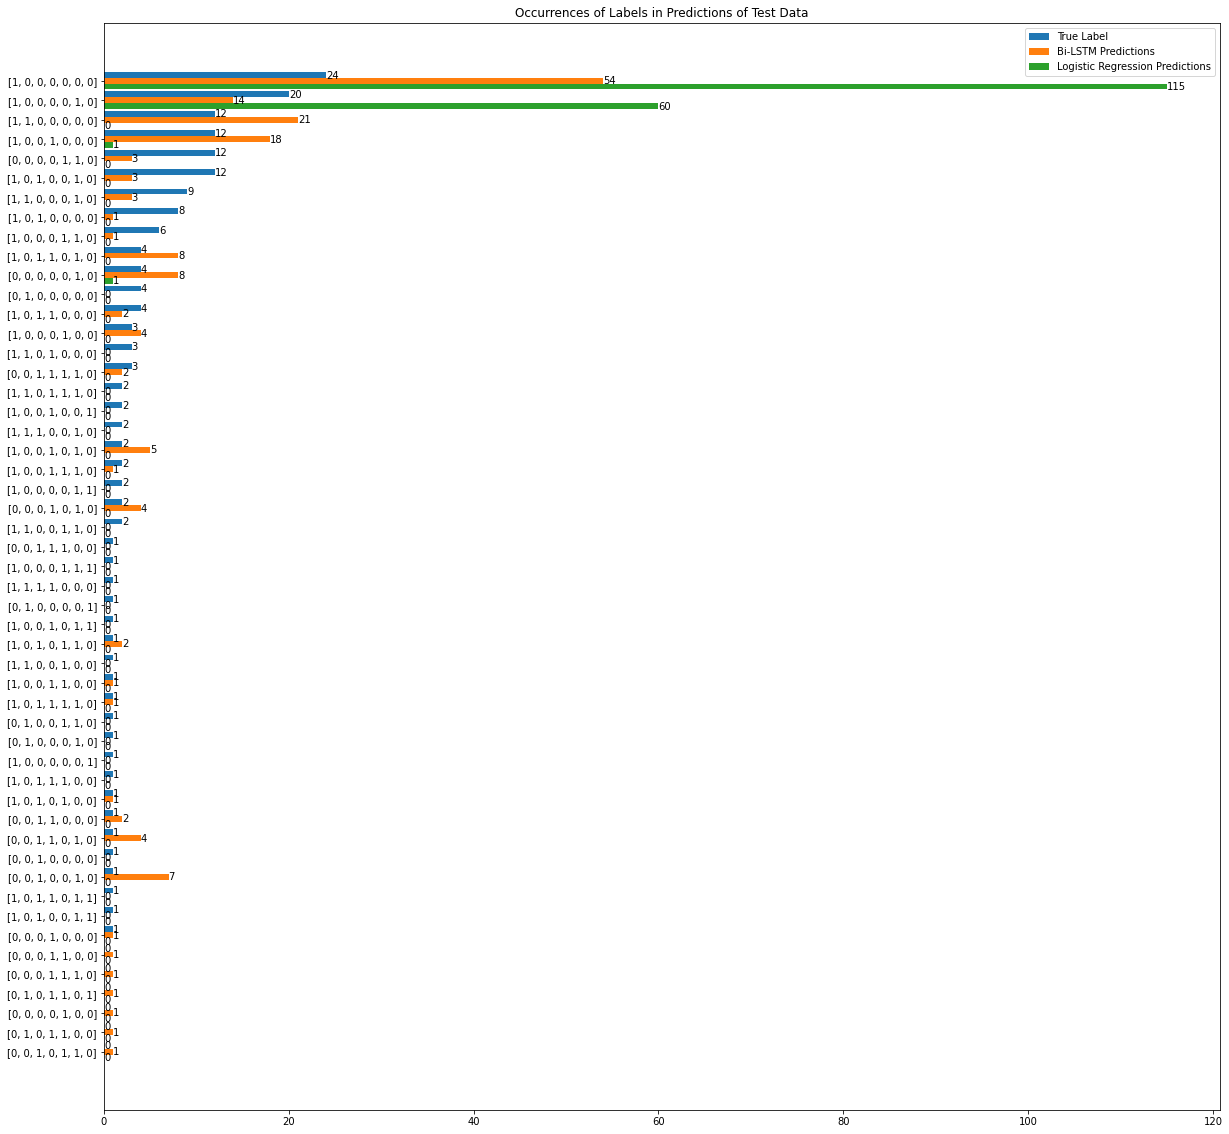

In [15]:
# get y values for each chart section
pred_lstm_y = [pred_lstm_count[el] for el in x_elements]
pred_logreg_y = [pred_logreg_count[el] for el in x_elements]
true_y = [true_count[el] for el in x_elements]

# set chart size
plt.rcParams["figure.figsize"] = (20,20)
x_axis = np.arange(len(x_elements))
barcontainer_true = plt.barh(x_axis + 0.3, true_y, label = 'True Label', height=0.3)
barcontainer_pred_lstm = plt.barh(x_axis, pred_lstm_y, label = 'Bi-LSTM Predictions', height=0.3)
barcontainer_pred_logreg = plt.barh(x_axis - 0.3, pred_logreg_y, label = 'Logistic Regression Predictions', height=0.3)

# add bar labels
plt.bar_label(barcontainer_true,true_y, label_type='edge')
plt.bar_label(barcontainer_pred_lstm, pred_lstm_y, label_type='edge')
plt.bar_label(barcontainer_pred_logreg, pred_logreg_y, label_type='edge')

# plot combined bar chart
plt.title('Occurrences of Labels in Predictions of Test Data')
plt.legend()
plt.yticks(x_axis, x_elements)
plt.show()

First of all, we can see that the blue bars in this chart (which correspond to the test set) do not resemble the distribution of the complete dataset. We have four labels that are distributed equally often (12 times), and the label where only Unbalanced Power Relations is given does not occur as much more as it does in the complete dataset. But, this is a trend that both models picked up, as we can see by the top largest bars of the Logistic Regression and the Bi-LSTM respectively. Interestingly, the Logistic Regression only predicted four different combinations of labels. There are combinations that only exist in the test set or in the predictions of the Bi-LSTM, but as this is a multilabel classification, this is only natural. There does not exist every combination of categories in the training set and the model might predict categories independently of each other.

### Error Analysis/Printing wrongly categorized samples

We will use our 10-fold cross-validation BiLSTM model to check out wrong predictions.

In [6]:
import pickle, ast, numpy as np, pandas as pd

In [7]:
# Load test paragraphs
test = pd.read_csv('data/dpm_test.csv')
# Load test labels 
# We need to turn the labels (currently list of strings) into a list of lists
y_test_low = test.loc[:, 'label'].to_numpy()
y_test_low = np.array([np.array(ast.literal_eval(x)) for x in y_test_low])

# Load 10-fold CV BiLSTM predictions
pred_low_cv = pickle.load(open('data/pred_low_cv.obj','rb'))

print('Sum lower level predictions: ',pred_low_cv[3].sum(axis=0))

Sum lower level predictions:  [130  31  24  45  25  82   2]


In [8]:
# turn predictions into form that can be added to the dataframe
pred_string = []
for pred in pred_low_cv[3]:
    pred_string.append(f'[{pred[0]}, {pred[1]}, {pred[2]}, {pred[3]}, {pred[4]}, {pred[5]}, {pred[6]}]')    

# append prediction labels to dataframe
test.insert(test.shape[1],column='predicted label',value=pred_string)

In [9]:
test

,Unnamed: 0,par_id,art_id,text,keyword,country,label,higher level label,predicted label
0,0,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,"[1, 0, 0, 1, 0, 0, 0]","[1, 1, 0]","[1, 0, 0, 0, 0, 0, 0]"
1,2,8330,@@17252299,Many refugees do n't want to be resettled anyw...,refugee,ng,"[0, 0, 1, 0, 0, 0, 0]","[0, 1, 0]","[0, 0, 1, 1, 0, 0, 0]"
2,4,4089,@@25597822,"""In a 90-degree view of his constituency , one...",homeless,pk,"[1, 0, 0, 0, 0, 0, 0]","[1, 0, 0]","[0, 0, 1, 1, 1, 1, 0]"
3,5,432,@@15802146,He depicts demonstrations by refugees at the b...,refugee,nz,"[0, 0, 0, 0, 0, 1, 0]","[0, 0, 1]","[0, 0, 0, 0, 0, 1, 0]"
4,9,369,@@15636898,""""""" People do n't understand the hurt , people...",women,ie,"[1, 0, 1, 1, 0, 1, 0]","[1, 1, 1]","[0, 0, 0, 1, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...
172,646,248,@@17606348,""""""" Clear evidence of outstanding miraculous o...",hopeless,ke,"[0, 0, 0, 0, 1, 1, 0]","[0, 0, 1]","[0, 0, 0, 0, 0, 1, 0]"
173,706,9624,@@3046230,The PCD act has the provision that a substitut...,disabled,ca,"[0, 0, 0, 0, 1, 1, 0]","[0, 0, 1]","[1, 0, 0, 1, 0, 0, 0]"
174,860,6910,@@19027470,World Refugee Day is marked on June 20 every y...,refugee,gh,"[0, 1, 0, 0, 0, 0, 1]","[1, 0, 1]","[1, 0, 0, 0, 1, 1, 0]"
175,919,9928,@@19128313,"In the city of Hyderabad , ' Walls of Kindness...",in-need,in,"[0, 1, 0, 0, 0, 1, 0]","[1, 0, 1]","[1, 1, 0, 0, 0, 0, 0]"


Check how many predictions are identical to the gold labels:

In [10]:
identical = []
for row in test.index:
    if np.array_equal(y_test_low[row], pred_low_cv[3][row]):
        identical.append(row)
print('Number of cases where predictions == gold:',len(identical))

Number of cases where predictions == gold: 27


Show examples of correct predicitons:

In [11]:
print(test.loc[identical[0],'text'],'LABEL:',test.loc[identical[0],'label'])
print(test.loc[identical[5],'text'],'LABEL:',test.loc[identical[5],'label'])
print(test.loc[identical[10],'text'],'LABEL:',test.loc[identical[10],'label'])
print(test.loc[identical[15],'text'],'LABEL:',test.loc[identical[15],'label'])

He depicts demonstrations by refugees at the border post , their catastrophic living conditions and the desperate attempt of several hundred to cross a river a few kilometres from the camp to get into Macedonia on 14 March 2016 . LABEL: [0, 0, 0, 0, 0, 1, 0]
He wants more done now to help those in need . LABEL: [1, 0, 0, 0, 0, 0, 0]
As exemplified by the teenager , let us all be kind to one another and help those in need without discriminating against one another based on race or religion . LABEL: [1, 0, 0, 0, 0, 0, 0]
""" She has one huge platform , and information can go out to places that really need to know what 's going on in her hometown . She has always availed not only her platform , her voice , but also resources -- tangible resources -- to help those most in need in Houston and around . """ LABEL: [1, 0, 0, 0, 0, 0, 0]


It looks as if the correct predictions relate to recognising the first label (Unbalanced power relations). Let's check if that is exclusively the case:

In [12]:
test.loc[identical]

,Unnamed: 0,par_id,art_id,text,keyword,country,label,higher level label,predicted label
3,5,432,@@15802146,He depicts demonstrations by refugees at the b...,refugee,nz,"[0, 0, 0, 0, 0, 1, 0]","[0, 0, 1]","[0, 0, 0, 0, 0, 1, 0]"
14,27,5506,@@21463456,""""""" We know Uber partners with an extensive ne...",vulnerable,nz,"[1, 0, 0, 0, 0, 0, 0]","[1, 0, 0]","[1, 0, 0, 0, 0, 0, 0]"
15,30,9518,@@4521109,Bond went out of his way to help the less fort...,homeless,jm,"[1, 1, 0, 0, 0, 1, 0]","[1, 0, 1]","[1, 1, 0, 0, 0, 1, 0]"
23,47,9455,@@40092352,"Speaking at the event , which was part of acti...",vulnerable,ng,"[1, 0, 0, 0, 0, 0, 0]","[1, 0, 0]","[1, 0, 0, 0, 0, 0, 0]"
25,54,3213,@@25884475,Hollywood star Leo Di Caprio urges help for re...,immigrant,sg,"[1, 0, 0, 0, 0, 0, 0]","[1, 0, 0]","[1, 0, 0, 0, 0, 0, 0]"
26,56,808,@@9280437,He wants more done now to help those in need .,in-need,nz,"[1, 0, 0, 0, 0, 0, 0]","[1, 0, 0]","[1, 0, 0, 0, 0, 0, 0]"
31,65,7004,@@4613365,We have the opportunity to give the gift of lo...,in-need,jm,"[1, 0, 0, 0, 1, 1, 0]","[1, 0, 1]","[1, 0, 0, 0, 1, 1, 0]"
40,88,4494,@@26167294,""""""" We shall remember him for the immense cont...",vulnerable,za,"[1, 0, 0, 0, 0, 0, 0]","[1, 0, 0]","[1, 0, 0, 0, 0, 0, 0]"
46,100,2133,@@312260,The drama 's compelling nature derived from a ...,homeless,gb,"[0, 0, 0, 0, 0, 1, 0]","[0, 0, 1]","[0, 0, 0, 0, 0, 1, 0]"
56,125,151,@@19974860,10:41am - Parents of children who died must ge...,poor-families,in,"[1, 0, 0, 1, 0, 0, 0]","[1, 1, 0]","[1, 0, 0, 1, 0, 0, 0]"


The trend is strong, but there are two cases (indices 30 and 58) where the first label is not present in the paragraph, so it is not exclusive.

In [13]:
# create dataframe with just predictions not identical to gold label
wrong_df = test.drop(index=identical)
wrong_df.reset_index(inplace=True, drop=True)

In [14]:
wrong_df

,Unnamed: 0,par_id,art_id,text,keyword,country,label,higher level label,predicted label
0,0,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,"[1, 0, 0, 1, 0, 0, 0]","[1, 1, 0]","[1, 0, 0, 0, 0, 0, 0]"
1,2,8330,@@17252299,Many refugees do n't want to be resettled anyw...,refugee,ng,"[0, 0, 1, 0, 0, 0, 0]","[0, 1, 0]","[0, 0, 1, 1, 0, 0, 0]"
2,4,4089,@@25597822,"""In a 90-degree view of his constituency , one...",homeless,pk,"[1, 0, 0, 0, 0, 0, 0]","[1, 0, 0]","[0, 0, 1, 1, 1, 1, 0]"
3,9,369,@@15636898,""""""" People do n't understand the hurt , people...",women,ie,"[1, 0, 1, 1, 0, 1, 0]","[1, 1, 1]","[0, 0, 0, 1, 0, 0, 0]"
4,10,773,@@1759840,Sheepherding in America has always been an imm...,immigrant,us,"[1, 0, 1, 0, 0, 1, 0]","[1, 1, 1]","[1, 0, 0, 0, 0, 1, 0]"
...,...,...,...,...,...,...,...,...,...
145,646,248,@@17606348,""""""" Clear evidence of outstanding miraculous o...",hopeless,ke,"[0, 0, 0, 0, 1, 1, 0]","[0, 0, 1]","[0, 0, 0, 0, 0, 1, 0]"
146,706,9624,@@3046230,The PCD act has the provision that a substitut...,disabled,ca,"[0, 0, 0, 0, 1, 1, 0]","[0, 0, 1]","[1, 0, 0, 1, 0, 0, 0]"
147,860,6910,@@19027470,World Refugee Day is marked on June 20 every y...,refugee,gh,"[0, 1, 0, 0, 0, 0, 1]","[1, 0, 1]","[1, 0, 0, 0, 1, 1, 0]"
148,919,9928,@@19128313,"In the city of Hyderabad , ' Walls of Kindness...",in-need,in,"[0, 1, 0, 0, 0, 1, 0]","[1, 0, 1]","[1, 1, 0, 0, 0, 0, 0]"


In [15]:
ex_list = [1,7,9,45,46]
for i in ex_list:
    print('PAR ID:',wrong_df.loc[i,'par_id'], wrong_df.loc[i,'text'],'\n',
        'LABEL:',wrong_df.loc[i,'label'],'PREDICTED:',wrong_df.loc[i,'predicted label'])

PAR ID: 8330 Many refugees do n't want to be resettled anywhere , let alone in the US . 
 LABEL: [0, 0, 1, 0, 0, 0, 0] PREDICTED: [0, 0, 1, 1, 0, 0, 0]
PAR ID: 5996 Real poverty of Britain : Shocking images of UK in the Sixties where poor really meant poor <h> THESE hard-hitting photographs offer a glimpse into the harrowing day-to-day for poor families living in Britain during the Sixties . 
 LABEL: [0, 0, 0, 1, 0, 1, 0] PREDICTED: [0, 0, 0, 0, 1, 1, 0]
PAR ID: 10326 A top health official said today that the government could consider subsidies to help poor families pay for healthy food -- or imposing taxes on unhealthy products -- if other efforts fail to encourage better eating habits among Hong Kong residents . Dr Regina Ching from the Health Department said such moves could be explored as a way to cut levels of chronic illnesses in the city , such ... 
 LABEL: [1, 0, 1, 0, 0, 0, 0] PREDICTED: [1, 0, 0, 0, 0, 1, 0]
PAR ID: 3130 Stephanie envisioned a model whereby women in need woul

As we can see in the above printed examples of non-identical predictions, sometimes our model only predicted wrongly for one category, sometimes for many. In several instances the model predicted only 'Unbalanced power relations' to occur -- this, while not ideal, is unsurprising: As we found out in our data analysis before, there are 189 instances where this PCL category appears alone in the entire dataset available to us, meaning this is a comparably often-occurring setting that our model probably picked up with a relatively high frequency.

Let's compare our "best" predictions to our random baseline:

In [16]:
# load random baseline predictions
random_pred = pickle.load(open('data/pred_low_random.obj','rb'))

In [17]:
identical_rand = []
for row in test.index:
    if np.array_equal(y_test_low[row], random_pred[row]):
        identical_rand.append(row)
print('Number of cases where predictions == gold:',len(identical_rand))

Number of cases where predictions == gold: 6


Random has fewer identical labels than our 10-fold cross-validation BiLSTM. 

In [18]:
# turn random predictions into form that can be added to the dataframe
rand_string = []
for pred in random_pred:
    rand_string.append(f'[{pred[0]}, {pred[1]}, {pred[2]}, {pred[3]}, {pred[4]}, {pred[5]}, {pred[6]}]')    

# append prediction labels to dataframe
test.insert(test.shape[1],column='random label',value=rand_string)

In [19]:
test.loc[identical_rand]

,Unnamed: 0,par_id,art_id,text,keyword,country,label,higher level label,predicted label,random label
14,27,5506,@@21463456,""""""" We know Uber partners with an extensive ne...",vulnerable,nz,"[1, 0, 0, 0, 0, 0, 0]","[1, 0, 0]","[1, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0]"
78,175,2591,@@1935812,"One petition signer , the Reverend Everett Sha...",refugee,gh,"[1, 0, 0, 0, 0, 0, 0]","[1, 0, 0]","[1, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0]"
89,199,4341,@@17139403,"The scheme saw an estimated 150,000 children f...",poor-families,gb,"[1, 0, 0, 1, 0, 0, 0]","[1, 1, 0]","[0, 0, 0, 1, 0, 1, 0]","[1, 0, 0, 1, 0, 0, 0]"
91,205,6027,@@4613219,"As a member of Care of Hope , Barnett provides...",homeless,jm,"[1, 0, 0, 0, 0, 1, 0]","[1, 0, 1]","[1, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 1, 0]"
107,248,8165,@@15581452,"Through Gawad Kalinga , Meloto has proven to b...",homeless,ph,"[1, 0, 0, 0, 0, 1, 0]","[1, 0, 1]","[1, 1, 1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 1, 0]"
129,299,6130,@@17475104,"""Speaking at the elaborate event , the first o...",vulnerable,ng,"[1, 0, 1, 0, 0, 0, 0]","[1, 1, 0]","[1, 0, 0, 0, 0, 0, 0]","[1, 0, 1, 0, 0, 0, 0]"


Again, there is a trend towards just labelling paragraphs "correctly" when the first PCL category is more or less the only occurring label. This is unsurprising since 'Unbalanced power relations' has the most occurrences generally and is therefore statistically more likely to be predicted.